In [1]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria produtos

In [2]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 224"
       )
tweets = query(cmd)
print(len(tweets))

18049


In [3]:
print(tweets[:20])

[('If you have missing roots, dental implants are the most common way to fix your tooth. https://t.co/Bg9ia6NXFp https://t.co/Q5rIiSdhhF',), ('Did you know! Dental Implants are the most significant Dental Innovation of our generation! It has best Long-Term... https://t.co/TBwDMwPGTy',), ('Check out Dental implant torque wrench Nobel Biocare #totalimplant https://t.co/hn4Bbl7iWM via @eBay',), ('Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen #totalimplant https://t.co/R4y2Qp08ZK via @eBay',), ('Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Compatible  https://t.co/bddzuSUOTA via @eBay',), ('3 dental implants with Bone Grafting https://t.co/zKftBFMgMI',), ('Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Compatible  https://t.co/bddzuSUOTA via @eBay',), ('3 dental implants with Bone graft https://t.co/TGH02FUc6y',), ('Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Comp #totalimpla

# Pré-processamento

In [4]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [5]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

18049


In [6]:
for d in doc_complete[:20]:
    print(d)

if you have missing roots dental implants are the most common way to fix your tooth 
did you know dental implants are the most significant dental innovation of our generation it has best long term 
check out dental implant torque wrench nobel biocare totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen compatible 
 dental implants with bone grafting 
dental implant torque wrench nobel biocare implantdirect hiossen compatible 
 dental implants with bone graft 
check out dental implant torque wrench nobel biocare implantdirect hiossen comp totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen dds totalimplant 
check out dental implant torque wrench nobel biocare implantdirect hiossen dds tool totalimplant 
check out dental implant torque wrench nobel biocare implantdirect dds tool totalimplant 
check out dental implant torque wren

In [7]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


7219.6
('bone', 1749)
('know', 1492)
('torque', 1304)
('wrench', 1298)
('titanium', 1148)
('check', 1124)
('straumann', 992)
('teeth', 934)
('announce', 930)
('alsgd', 915)
('nobel', 868)
('reduction', 795)
('handpiece', 746)
('systems', 740)
('system', 736)
('success', 725)
('biocare', 720)
('contra', 672)
('angle', 668)
('restoration', 618)
('need', 612)
('rate', 586)
('technology', 565)
('tooth', 561)
('graft', 550)
('mouth', 546)
('ceramic', 541)
('grafting', 521)
('placement', 517)
('adin', 497)


In [8]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

['missing', 'roots', 'common', 'tooth']
['know', 'significant', 'innovation', 'generation', 'best', 'long', 'term']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'compatible']
['bone', 'grafting']
['torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'compatible']
['bone', 'graft']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'comp', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'hiossen', 'tool', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'implantdirect', 'tool', 'totalimplant']
['check', 'torque', 'wrench', 'nobel', 'biocare', 'tool', 'totalimplant']
['break', 'drill', 'bone', 'graft', 'firstworld

# Topic Modeling

In [9]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [10]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [11]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [12]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [13]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [14]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [15]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [16]:
dtm

<18049x6394 sparse matrix of type '<class 'numpy.int32'>'
	with 97113 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [22]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 110, 10))
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]


In [23]:
ks

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [24]:
varying_params

[{'alpha': 0.1, 'n_topics': 10},
 {'alpha': 0.05, 'n_topics': 20},
 {'alpha': 0.03333333333333333, 'n_topics': 30},
 {'alpha': 0.025, 'n_topics': 40},
 {'alpha': 0.02, 'n_topics': 50},
 {'alpha': 0.016666666666666666, 'n_topics': 60},
 {'alpha': 0.014285714285714285, 'n_topics': 70},
 {'alpha': 0.0125, 'n_topics': 80},
 {'alpha': 0.011111111111111112, 'n_topics': 90},
 {'alpha': 0.01, 'n_topics': 100}]

In [25]:
eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 10
INFO:lda:n_words: 98337
INFO:lda:n_topics: 40
INFO:lda:n_iter: 2000
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 20
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_topics: 60
INFO:lda:n_iter: 2000
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_iter: 2000
INFO:lda:n_words: 98337
INFO:l

INFO:lda:<70> log likelihood: -551921
INFO:lda:<90> log likelihood: -552682
INFO:lda:<240> log likelihood: -600209
INFO:lda:<130> log likelihood: -560805
INFO:lda:<190> log likelihood: -572603
INFO:lda:<40> log likelihood: -568452
INFO:lda:<250> log likelihood: -599890
INFO:lda:<140> log likelihood: -560632
INFO:lda:<120> log likelihood: -553209
INFO:lda:<100> log likelihood: -550256
INFO:lda:<200> log likelihood: -572173
INFO:lda:<260> log likelihood: -599943
INFO:lda:<80> log likelihood: -550264
INFO:lda:<70> log likelihood: -548655
INFO:lda:<210> log likelihood: -572752
INFO:lda:<270> log likelihood: -599699
INFO:lda:<150> log likelihood: -560514
INFO:lda:<60> log likelihood: -554243
INFO:lda:<280> log likelihood: -599979
INFO:lda:<130> log likelihood: -552772
INFO:lda:<220> log likelihood: -572043
INFO:lda:<60> log likelihood: -555582
INFO:lda:<110> log likelihood: -549598
INFO:lda:<290> log likelihood: -599924
INFO:lda:<160> log likelihood: -560249
INFO:lda:<90> log likelihood: -5

INFO:lda:<190> log likelihood: -537148
INFO:lda:<270> log likelihood: -544866
INFO:lda:<770> log likelihood: -598030
INFO:lda:<520> log likelihood: -570048
INFO:lda:<330> log likelihood: -548280
INFO:lda:<410> log likelihood: -557381
INFO:lda:<230> log likelihood: -542083
INFO:lda:<780> log likelihood: -598276
INFO:lda:<170> log likelihood: -538398
INFO:lda:<530> log likelihood: -570164
INFO:lda:<790> log likelihood: -598702
INFO:lda:<160> log likelihood: -535414
INFO:lda:<130> log likelihood: -539333
INFO:lda:<420> log likelihood: -556978
INFO:lda:<280> log likelihood: -544735
INFO:lda:<340> log likelihood: -547856
INFO:lda:<800> log likelihood: -598264
INFO:lda:<200> log likelihood: -536337
INFO:lda:<540> log likelihood: -569845
INFO:lda:<810> log likelihood: -598305
INFO:lda:<430> log likelihood: -557331
INFO:lda:<350> log likelihood: -547866
INFO:lda:<820> log likelihood: -598146
INFO:lda:<240> log likelihood: -542185
INFO:lda:<550> log likelihood: -570107
INFO:lda:<290> log likeli

INFO:lda:<1300> log likelihood: -597825
INFO:lda:<280> log likelihood: -535847
INFO:lda:<370> log likelihood: -539743
INFO:lda:<870> log likelihood: -569444
INFO:lda:<660> log likelihood: -556388
INFO:lda:<1310> log likelihood: -597920
INFO:lda:<260> log likelihood: -531415
INFO:lda:<880> log likelihood: -569843
INFO:lda:<450> log likelihood: -542367
INFO:lda:<1320> log likelihood: -597913
INFO:lda:<670> log likelihood: -556559
INFO:lda:<320> log likelihood: -533227
INFO:lda:<550> log likelihood: -546416
INFO:lda:<1330> log likelihood: -598021
INFO:lda:<890> log likelihood: -569709
INFO:lda:<380> log likelihood: -539312
INFO:lda:<680> log likelihood: -556122
INFO:lda:<220> log likelihood: -534155
INFO:lda:<1340> log likelihood: -597780
INFO:lda:<290> log likelihood: -535310
INFO:lda:<900> log likelihood: -569980
INFO:lda:<1350> log likelihood: -598018
INFO:lda:<560> log likelihood: -546717
INFO:lda:<460> log likelihood: -542903
INFO:lda:<690> log likelihood: -556593
INFO:lda:<1360> log

INFO:lda:<1220> log likelihood: -569313
INFO:lda:<390> log likelihood: -533197
INFO:lda:<1800> log likelihood: -598174
INFO:lda:<520> log likelihood: -537959
INFO:lda:<1810> log likelihood: -598028
INFO:lda:<1230> log likelihood: -569417
INFO:lda:<300> log likelihood: -532725
INFO:lda:<630> log likelihood: -542085
INFO:lda:<930> log likelihood: -556140
INFO:lda:<760> log likelihood: -546017
INFO:lda:<360> log likelihood: -529693
INFO:lda:<1820> log likelihood: -597712
INFO:lda:<1240> log likelihood: -569399
INFO:lda:<940> log likelihood: -556186
INFO:lda:<770> log likelihood: -546299
INFO:lda:<1830> log likelihood: -597888
INFO:lda:<640> log likelihood: -542204
INFO:lda:<400> log likelihood: -532980
INFO:lda:<1250> log likelihood: -569576
INFO:lda:<460> log likelihood: -532395
INFO:lda:<1840> log likelihood: -597787
INFO:lda:<530> log likelihood: -537731
INFO:lda:<780> log likelihood: -546286
INFO:lda:<1260> log likelihood: -569663
INFO:lda:<950> log likelihood: -556272
INFO:lda:<1850>

INFO:lda:<1630> log likelihood: -569289
INFO:lda:<830> log likelihood: -541182
INFO:lda:<690> log likelihood: -537448
INFO:lda:<1010> log likelihood: -546124
INFO:lda:<1240> log likelihood: -555001
INFO:lda:<1640> log likelihood: -569488
INFO:lda:<590> log likelihood: -532050
INFO:lda:<1650> log likelihood: -569363
INFO:lda:<1250> log likelihood: -555246
INFO:lda:<520> log likelihood: -531322
INFO:lda:<410> log likelihood: -530825
INFO:lda:<1020> log likelihood: -546087
INFO:lda:<470> log likelihood: -528551
INFO:lda:<840> log likelihood: -541305
INFO:lda:<700> log likelihood: -537381
INFO:lda:<1660> log likelihood: -568946
INFO:lda:<1260> log likelihood: -555106
INFO:lda:<1030> log likelihood: -545968
INFO:lda:<1670> log likelihood: -568899
INFO:lda:<1270> log likelihood: -555029
INFO:lda:<600> log likelihood: -532401
INFO:lda:<850> log likelihood: -540906
INFO:lda:<1680> log likelihood: -569150
INFO:lda:<710> log likelihood: -537142
INFO:lda:<1280> log likelihood: -555243
INFO:lda:<1

INFO:lda:<760> log likelihood: -531151
INFO:lda:<1300> log likelihood: -545913
INFO:lda:<890> log likelihood: -537146
INFO:lda:<660> log likelihood: -530604
INFO:lda:<600> log likelihood: -527594
INFO:lda:<1610> log likelihood: -554606
INFO:lda:<1060> log likelihood: -541120
INFO:lda:<1310> log likelihood: -546145
INFO:lda:<520> log likelihood: -529163
INFO:lda:<900> log likelihood: -536735
INFO:lda:<770> log likelihood: -531142
INFO:lda:<1620> log likelihood: -554545
INFO:lda:<1320> log likelihood: -546306
INFO:lda:<670> log likelihood: -531294
INFO:lda:<1070> log likelihood: -540750
INFO:lda:<1630> log likelihood: -555137
INFO:lda:<610> log likelihood: -527767
INFO:lda:<910> log likelihood: -536637
INFO:lda:<1330> log likelihood: -546058
INFO:lda:<780> log likelihood: -531361
INFO:lda:<1640> log likelihood: -555179
INFO:lda:<1080> log likelihood: -540975
INFO:lda:<530> log likelihood: -529831
INFO:lda:<1340> log likelihood: -545682
INFO:lda:<680> log likelihood: -530901
INFO:lda:<165

INFO:lda:<1670> log likelihood: -546300
INFO:lda:<1360> log likelihood: -540804
INFO:lda:<840> log likelihood: -530559
INFO:lda:<970> log likelihood: -530990
INFO:lda:<1680> log likelihood: -546215
INFO:lda:<1140> log likelihood: -536110
INFO:lda:<770> log likelihood: -526892
INFO:lda:<1370> log likelihood: -540767
INFO:lda:<1690> log likelihood: -545830
INFO:lda:<660> log likelihood: -527290
INFO:lda:<980> log likelihood: -531205
INFO:lda:<850> log likelihood: -530043
INFO:lda:<1150> log likelihood: -536257
INFO:lda:<1700> log likelihood: -545950
INFO:lda:<1380> log likelihood: -540526
INFO:lda:<780> log likelihood: -526785
INFO:lda:<1710> log likelihood: -545796
INFO:lda:<990> log likelihood: -531324
INFO:lda:<1390> log likelihood: -540135
INFO:lda:<1160> log likelihood: -536685
INFO:lda:<860> log likelihood: -530248
INFO:lda:<670> log likelihood: -528413
INFO:lda:<1720> log likelihood: -545938
INFO:lda:<1170> log likelihood: -536345
INFO:lda:<790> log likelihood: -527219
INFO:lda:<1

INFO:lda:<980> log likelihood: -526438
INFO:lda:<1750> log likelihood: -539941
INFO:lda:<1260> log likelihood: -530358
INFO:lda:<1470> log likelihood: -536381
INFO:lda:<1760> log likelihood: -540010
INFO:lda:<850> log likelihood: -527234
INFO:lda:<1270> log likelihood: -530651
INFO:lda:<1480> log likelihood: -536398
INFO:lda:<1100> log likelihood: -529792
INFO:lda:<990> log likelihood: -526833
INFO:lda:<1770> log likelihood: -539817
INFO:lda:<1490> log likelihood: -536176
INFO:lda:<1280> log likelihood: -530490
INFO:lda:<1780> log likelihood: -539717
INFO:lda:<1110> log likelihood: -529515
INFO:lda:<860> log likelihood: -527141
INFO:lda:<1000> log likelihood: -526995
INFO:lda:<1500> log likelihood: -536034
INFO:lda:<1790> log likelihood: -539798
INFO:lda:<1290> log likelihood: -530570
INFO:lda:<1120> log likelihood: -530266
INFO:lda:<1800> log likelihood: -540324
INFO:lda:<1510> log likelihood: -535984
INFO:lda:<870> log likelihood: -527125
INFO:lda:<1010> log likelihood: -526624
INFO:

INFO:lda:<1650> log likelihood: -530079
INFO:lda:<1110> log likelihood: -526386
INFO:lda:<1430> log likelihood: -529229
INFO:lda:<1930> log likelihood: -536131
INFO:lda:<1280> log likelihood: -526370
INFO:lda:<1660> log likelihood: -530369
INFO:lda:<1940> log likelihood: -535745
INFO:lda:<1440> log likelihood: -529346
INFO:lda:<1120> log likelihood: -526329
INFO:lda:<1290> log likelihood: -526103
INFO:lda:<1670> log likelihood: -530629
INFO:lda:<1950> log likelihood: -535650
INFO:lda:<1450> log likelihood: -529421
INFO:lda:<1680> log likelihood: -530249
INFO:lda:<1960> log likelihood: -535837
INFO:lda:<1130> log likelihood: -526561
INFO:lda:<1300> log likelihood: -526113
INFO:lda:<1460> log likelihood: -529498
INFO:lda:<1970> log likelihood: -535543
INFO:lda:<1690> log likelihood: -530392
INFO:lda:<1140> log likelihood: -526527
INFO:lda:<1310> log likelihood: -526587
INFO:lda:<1980> log likelihood: -535993
INFO:lda:<1700> log likelihood: -530595
INFO:lda:<1470> log likelihood: -529233


INFO:lda:<1980> log likelihood: -528860
INFO:lda:<1780> log likelihood: -525343
INFO:lda:<1990> log likelihood: -529065
INFO:lda:<1560> log likelihood: -525876
INFO:lda:<1999> log likelihood: -528820
INFO:lda:<1790> log likelihood: -525756
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -529065.142314
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.035554
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 233.360096
INFO:lda:<1570> log likelihood: -526227
INFO:lda:<1800> log likelihood: -525710
INFO:lda:<1580> log likelihood: -525667
INFO:lda:<1810> log likelihood: -525279
INFO:lda:<1590> log likelihood: -525800
INFO:lda:<1820> log likelihood: -525280
INFO:lda:<1600> log likelihood: -526267
INFO:lda:<1830> log likelihood: -525551
INFO:lda:<1610> log likelihood: -525963
INFO:lda:<1840> log likelihood: -525508
INFO:lda:<1620> log likelihood: -525503
INFO:lda:<1850> log likelihood: -525177
INFO:lda:<1860> log likelihood: -525028
INFO:lda:<1630> l

plotting evaluation results


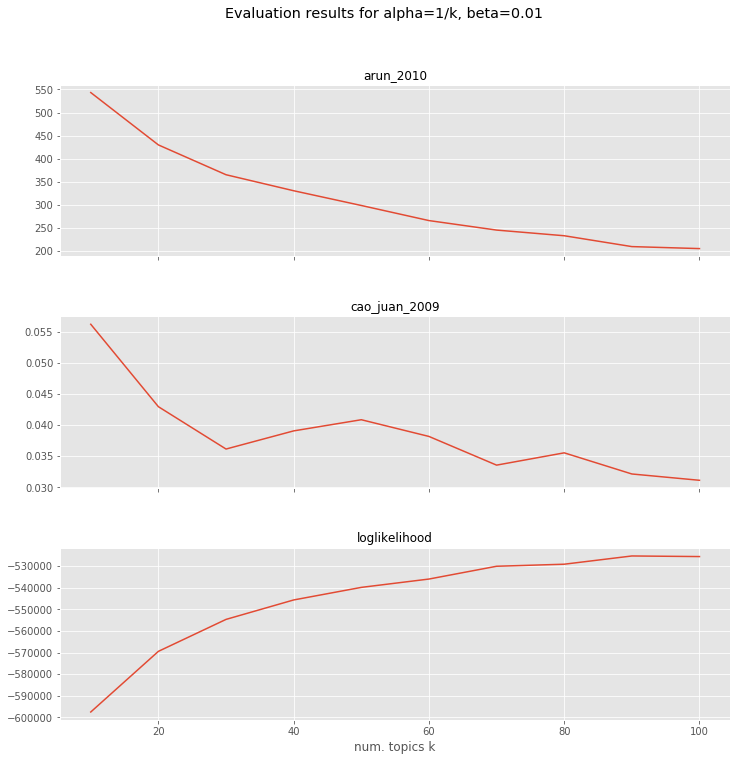

In [26]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 1/k beta: 0,1

In [27]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 110, 10))
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 60
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 40
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 20
INFO:lda:n_words: 98337
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 10
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:n_words: 98337
INFO:lda:n_topics: 100
INFO:lda:n_topics: 70
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6394
INFO:

INFO:lda:<270> log likelihood: -607799
INFO:lda:<280> log likelihood: -607635
INFO:lda:<70> log likelihood: -590309
INFO:lda:<50> log likelihood: -617315
INFO:lda:<140> log likelihood: -583243
INFO:lda:<180> log likelihood: -585574
INFO:lda:<290> log likelihood: -607900
INFO:lda:<80> log likelihood: -588987
INFO:lda:<60> log likelihood: -596908
INFO:lda:<300> log likelihood: -607684
INFO:lda:<110> log likelihood: -584249
INFO:lda:<190> log likelihood: -585701
INFO:lda:<310> log likelihood: -607320
INFO:lda:<150> log likelihood: -583296
INFO:lda:<60> log likelihood: -606346
INFO:lda:<320> log likelihood: -607648
INFO:lda:<90> log likelihood: -586705
INFO:lda:<80> log likelihood: -587769
INFO:lda:<200> log likelihood: -585157
INFO:lda:<330> log likelihood: -607699
INFO:lda:<120> log likelihood: -583583
INFO:lda:<160> log likelihood: -582579
INFO:lda:<50> log likelihood: -620229
INFO:lda:<210> log likelihood: -585883
INFO:lda:<340> log likelihood: -607592
INFO:lda:<70> log likelihood: -59

INFO:lda:<810> log likelihood: -606714
INFO:lda:<180> log likelihood: -583409
INFO:lda:<260> log likelihood: -580554
INFO:lda:<170> log likelihood: -585922
INFO:lda:<130> log likelihood: -594421
INFO:lda:<410> log likelihood: -581709
INFO:lda:<820> log likelihood: -606142
INFO:lda:<540> log likelihood: -583841
INFO:lda:<310> log likelihood: -580912
INFO:lda:<830> log likelihood: -606127
INFO:lda:<220> log likelihood: -580818
INFO:lda:<150> log likelihood: -593302
INFO:lda:<840> log likelihood: -606638
INFO:lda:<550> log likelihood: -583675
INFO:lda:<420> log likelihood: -581241
INFO:lda:<270> log likelihood: -581728
INFO:lda:<850> log likelihood: -606637
INFO:lda:<320> log likelihood: -580347
INFO:lda:<860> log likelihood: -606168
INFO:lda:<560> log likelihood: -584099
INFO:lda:<190> log likelihood: -583137
INFO:lda:<180> log likelihood: -585735
INFO:lda:<870> log likelihood: -606126
INFO:lda:<430> log likelihood: -581466
INFO:lda:<880> log likelihood: -606609
INFO:lda:<230> log likeli

INFO:lda:<1340> log likelihood: -605957
INFO:lda:<300> log likelihood: -581517
INFO:lda:<690> log likelihood: -580728
INFO:lda:<360> log likelihood: -579600
INFO:lda:<890> log likelihood: -583781
INFO:lda:<280> log likelihood: -584364
INFO:lda:<1350> log likelihood: -605719
INFO:lda:<520> log likelihood: -579850
INFO:lda:<430> log likelihood: -580261
INFO:lda:<1360> log likelihood: -605673
INFO:lda:<700> log likelihood: -580770
INFO:lda:<900> log likelihood: -583721
INFO:lda:<220> log likelihood: -590479
INFO:lda:<1370> log likelihood: -605787
INFO:lda:<530> log likelihood: -579966
INFO:lda:<310> log likelihood: -581699
INFO:lda:<370> log likelihood: -579855
INFO:lda:<910> log likelihood: -583484
INFO:lda:<710> log likelihood: -581254
INFO:lda:<1380> log likelihood: -605448
INFO:lda:<440> log likelihood: -580515
INFO:lda:<250> log likelihood: -588127
INFO:lda:<920> log likelihood: -583739
INFO:lda:<1390> log likelihood: -606108
INFO:lda:<290> log likelihood: -584424
INFO:lda:<720> log 

INFO:lda:<390> log likelihood: -582892
INFO:lda:<300> log likelihood: -588742
INFO:lda:<1220> log likelihood: -583620
INFO:lda:<1910> log likelihood: -605629
INFO:lda:<430> log likelihood: -580889
INFO:lda:<510> log likelihood: -578837
INFO:lda:<1920> log likelihood: -605703
INFO:lda:<1230> log likelihood: -583339
INFO:lda:<950> log likelihood: -580963
INFO:lda:<720> log likelihood: -579491
INFO:lda:<1930> log likelihood: -605713
INFO:lda:<340> log likelihood: -587229
INFO:lda:<600> log likelihood: -579381
INFO:lda:<960> log likelihood: -581227
INFO:lda:<1940> log likelihood: -605536
INFO:lda:<1240> log likelihood: -583445
INFO:lda:<730> log likelihood: -580181
INFO:lda:<1950> log likelihood: -605809
INFO:lda:<1250> log likelihood: -583179
INFO:lda:<520> log likelihood: -579067
INFO:lda:<1960> log likelihood: -605680
INFO:lda:<440> log likelihood: -580829
INFO:lda:<970> log likelihood: -580882
INFO:lda:<1260> log likelihood: -583323
INFO:lda:<610> log likelihood: -579538
INFO:lda:<1970

INFO:lda:<1670> log likelihood: -583474
INFO:lda:<790> log likelihood: -578956
INFO:lda:<1680> log likelihood: -583155
INFO:lda:<1290> log likelihood: -581010
INFO:lda:<980> log likelihood: -578847
INFO:lda:<1690> log likelihood: -583054
INFO:lda:<680> log likelihood: -577845
INFO:lda:<800> log likelihood: -579428
INFO:lda:<1300> log likelihood: -580510
INFO:lda:<410> log likelihood: -587495
INFO:lda:<520> log likelihood: -582654
INFO:lda:<990> log likelihood: -579568
INFO:lda:<1700> log likelihood: -582850
INFO:lda:<590> log likelihood: -580407
INFO:lda:<460> log likelihood: -585469
INFO:lda:<1310> log likelihood: -580564
INFO:lda:<1710> log likelihood: -583507
INFO:lda:<810> log likelihood: -578844
INFO:lda:<690> log likelihood: -578435
INFO:lda:<1000> log likelihood: -578896
INFO:lda:<1720> log likelihood: -583227
INFO:lda:<1320> log likelihood: -580708
INFO:lda:<1730> log likelihood: -583095
INFO:lda:<820> log likelihood: -578834
INFO:lda:<1010> log likelihood: -579304
INFO:lda:<53

INFO:lda:<1270> log likelihood: -578793
INFO:lda:<750> log likelihood: -579387
INFO:lda:<660> log likelihood: -581688
INFO:lda:<880> log likelihood: -578234
INFO:lda:<530> log likelihood: -587231
INFO:lda:<1680> log likelihood: -580217
INFO:lda:<1280> log likelihood: -579706
INFO:lda:<1040> log likelihood: -578631
INFO:lda:<1690> log likelihood: -580244
INFO:lda:<590> log likelihood: -584414
INFO:lda:<1290> log likelihood: -579670
INFO:lda:<760> log likelihood: -579441
INFO:lda:<1700> log likelihood: -580433
INFO:lda:<890> log likelihood: -578122
INFO:lda:<1050> log likelihood: -578475
INFO:lda:<670> log likelihood: -582280
INFO:lda:<1710> log likelihood: -580335
INFO:lda:<1300> log likelihood: -579176
INFO:lda:<540> log likelihood: -586976
INFO:lda:<1720> log likelihood: -580572
INFO:lda:<900> log likelihood: -577472
INFO:lda:<1060> log likelihood: -578486
INFO:lda:<600> log likelihood: -583835
INFO:lda:<770> log likelihood: -579591
INFO:lda:<1310> log likelihood: -579248
INFO:lda:<17

INFO:lda:<750> log likelihood: -583615
INFO:lda:<850> log likelihood: -582209
INFO:lda:<1340> log likelihood: -577910
INFO:lda:<970> log likelihood: -580007
INFO:lda:<1670> log likelihood: -579627
INFO:lda:<1140> log likelihood: -577820
INFO:lda:<1350> log likelihood: -578547
INFO:lda:<1680> log likelihood: -578527
INFO:lda:<860> log likelihood: -581736
INFO:lda:<760> log likelihood: -583532
INFO:lda:<980> log likelihood: -579541
INFO:lda:<690> log likelihood: -586366
INFO:lda:<1150> log likelihood: -577812
INFO:lda:<1690> log likelihood: -578347
INFO:lda:<1360> log likelihood: -578912
INFO:lda:<990> log likelihood: -579347
INFO:lda:<1700> log likelihood: -578730
INFO:lda:<870> log likelihood: -581024
INFO:lda:<1370> log likelihood: -578912
INFO:lda:<1160> log likelihood: -578053
INFO:lda:<770> log likelihood: -584093
INFO:lda:<700> log likelihood: -586505
INFO:lda:<1710> log likelihood: -579262
INFO:lda:<1000> log likelihood: -579430
INFO:lda:<1380> log likelihood: -578438
INFO:lda:<1

INFO:lda:<1730> log likelihood: -578034
INFO:lda:<1260> log likelihood: -579344
INFO:lda:<970> log likelihood: -583415
INFO:lda:<1470> log likelihood: -577719
INFO:lda:<1740> log likelihood: -577874
INFO:lda:<1100> log likelihood: -581795
INFO:lda:<1750> log likelihood: -578635
INFO:lda:<1480> log likelihood: -577811
INFO:lda:<880> log likelihood: -585605
INFO:lda:<1270> log likelihood: -579616
INFO:lda:<980> log likelihood: -583837
INFO:lda:<1110> log likelihood: -581365
INFO:lda:<1760> log likelihood: -578877
INFO:lda:<1490> log likelihood: -578085
INFO:lda:<1280> log likelihood: -579390
INFO:lda:<1770> log likelihood: -578808
INFO:lda:<890> log likelihood: -585210
INFO:lda:<1120> log likelihood: -581394
INFO:lda:<1500> log likelihood: -577547
INFO:lda:<990> log likelihood: -583688
INFO:lda:<1290> log likelihood: -578939
INFO:lda:<1780> log likelihood: -578184
INFO:lda:<1510> log likelihood: -577610
INFO:lda:<1130> log likelihood: -581445
INFO:lda:<1790> log likelihood: -578618
INFO:

INFO:lda:<1260> log likelihood: -583131
INFO:lda:<1430> log likelihood: -580802
INFO:lda:<1650> log likelihood: -578935
INFO:lda:<1920> log likelihood: -577088
INFO:lda:<1140> log likelihood: -585369
INFO:lda:<1270> log likelihood: -582392
INFO:lda:<1930> log likelihood: -576978
INFO:lda:<1440> log likelihood: -581110
INFO:lda:<1660> log likelihood: -579091
INFO:lda:<1940> log likelihood: -577254
INFO:lda:<1670> log likelihood: -579102
INFO:lda:<1450> log likelihood: -581705
INFO:lda:<1280> log likelihood: -582750
INFO:lda:<1150> log likelihood: -585307
INFO:lda:<1950> log likelihood: -577792
INFO:lda:<1680> log likelihood: -579013
INFO:lda:<1460> log likelihood: -581502
INFO:lda:<1960> log likelihood: -577512
INFO:lda:<1290> log likelihood: -582819
INFO:lda:<1160> log likelihood: -585370
INFO:lda:<1690> log likelihood: -578893
INFO:lda:<1470> log likelihood: -581329
INFO:lda:<1970> log likelihood: -577017
INFO:lda:<1300> log likelihood: -582907
INFO:lda:<1700> log likelihood: -579091


INFO:lda:<1750> log likelihood: -582264
INFO:lda:<1990> log likelihood: -581657
INFO:lda:<1580> log likelihood: -583899
INFO:lda:<1760> log likelihood: -582684
INFO:lda:<1999> log likelihood: -581205
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -581657.092104
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.041996
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 295.329893
INFO:lda:<1590> log likelihood: -584600
INFO:lda:<1770> log likelihood: -582244
INFO:lda:<1600> log likelihood: -584659
INFO:lda:<1780> log likelihood: -582420
INFO:lda:<1790> log likelihood: -582692
INFO:lda:<1610> log likelihood: -584454
INFO:lda:<1800> log likelihood: -583186
INFO:lda:<1620> log likelihood: -584293
INFO:lda:<1810> log likelihood: -582824
INFO:lda:<1630> log likelihood: -584615
INFO:lda:<1820> log likelihood: -582508
INFO:lda:<1640> log likelihood: -584034
INFO:lda:<1830> log likelihood: -582780
INFO:lda:<1650> log likelihood: -583934
INFO:lda:<1840> l

plotting evaluation results


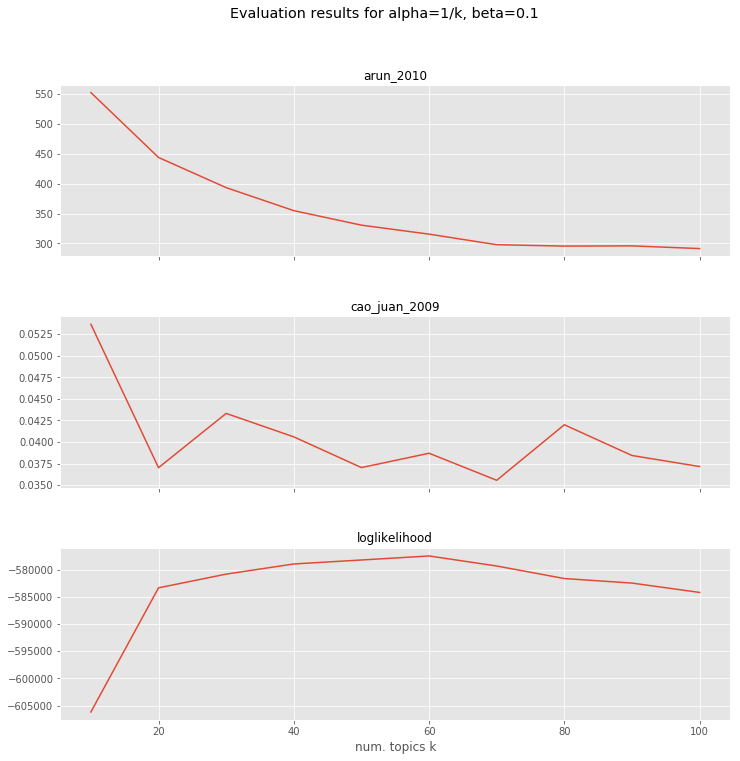

In [28]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [29]:
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
    

cao : 0.03555380576343616 	 70
arun: 291.1530922647832 	 100


### alpha: 0.1 beta: 1/(10*k)

In [30]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 110, 10))
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_topics: 20
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_topics: 80
INFO:lda:n_topics: 40
INFO:lda:n_topics: 50
INFO:lda:n_topics: 60
INFO:lda:n_topics: 10
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6394
INFO:lda:n

INFO:lda:<90> log likelihood: -602761
INFO:lda:<70> log likelihood: -609713
INFO:lda:<130> log likelihood: -587923
INFO:lda:<290> log likelihood: -599924
INFO:lda:<90> log likelihood: -598075
INFO:lda:<180> log likelihood: -591709
INFO:lda:<300> log likelihood: -599301
INFO:lda:<140> log likelihood: -587898
INFO:lda:<310> log likelihood: -599180
INFO:lda:<60> log likelihood: -617547
INFO:lda:<190> log likelihood: -591350
INFO:lda:<100> log likelihood: -601323
INFO:lda:<80> log likelihood: -608653
INFO:lda:<320> log likelihood: -599513
INFO:lda:<60> log likelihood: -613445
INFO:lda:<100> log likelihood: -597454
INFO:lda:<150> log likelihood: -587471
INFO:lda:<330> log likelihood: -599097
INFO:lda:<50> log likelihood: -628047
INFO:lda:<200> log likelihood: -591149
INFO:lda:<50> log likelihood: -633986
INFO:lda:<340> log likelihood: -598974
INFO:lda:<110> log likelihood: -595663
INFO:lda:<350> log likelihood: -598996
INFO:lda:<110> log likelihood: -600228
INFO:lda:<160> log likelihood: -5

INFO:lda:<520> log likelihood: -589036
INFO:lda:<850> log likelihood: -598449
INFO:lda:<400> log likelihood: -584327
INFO:lda:<220> log likelihood: -598625
INFO:lda:<300> log likelihood: -589840
INFO:lda:<860> log likelihood: -598273
INFO:lda:<530> log likelihood: -589267
INFO:lda:<140> log likelihood: -614172
INFO:lda:<870> log likelihood: -598335
INFO:lda:<260> log likelihood: -592474
INFO:lda:<410> log likelihood: -584149
INFO:lda:<880> log likelihood: -598545
INFO:lda:<180> log likelihood: -606428
INFO:lda:<180> log likelihood: -602994
INFO:lda:<540> log likelihood: -589723
INFO:lda:<310> log likelihood: -589245
INFO:lda:<130> log likelihood: -622682
INFO:lda:<890> log likelihood: -598178
INFO:lda:<230> log likelihood: -598685
INFO:lda:<550> log likelihood: -589596
INFO:lda:<420> log likelihood: -584192
INFO:lda:<900> log likelihood: -598267
INFO:lda:<320> log likelihood: -589291
INFO:lda:<910> log likelihood: -597969
INFO:lda:<560> log likelihood: -589315
INFO:lda:<920> log likeli

INFO:lda:<1420> log likelihood: -597895
INFO:lda:<880> log likelihood: -588964
INFO:lda:<230> log likelihood: -610608
INFO:lda:<660> log likelihood: -583915
INFO:lda:<510> log likelihood: -587669
INFO:lda:<420> log likelihood: -589910
INFO:lda:<1430> log likelihood: -597814
INFO:lda:<280> log likelihood: -602054
INFO:lda:<360> log likelihood: -596530
INFO:lda:<210> log likelihood: -618593
INFO:lda:<890> log likelihood: -589023
INFO:lda:<1440> log likelihood: -597576
INFO:lda:<300> log likelihood: -599008
INFO:lda:<670> log likelihood: -583886
INFO:lda:<1450> log likelihood: -597939
INFO:lda:<900> log likelihood: -589027
INFO:lda:<520> log likelihood: -587635
INFO:lda:<430> log likelihood: -590148
INFO:lda:<1460> log likelihood: -597824
INFO:lda:<910> log likelihood: -588757
INFO:lda:<680> log likelihood: -583391
INFO:lda:<1470> log likelihood: -598017
INFO:lda:<370> log likelihood: -596099
INFO:lda:<530> log likelihood: -587779
INFO:lda:<290> log likelihood: -602107
INFO:lda:<1480> log

INFO:lda:<940> log likelihood: -583166
INFO:lda:<1230> log likelihood: -588655
INFO:lda:<290> log likelihood: -615497
INFO:lda:<580> log likelihood: -589206
INFO:lda:<1970> log likelihood: -597473
INFO:lda:<1240> log likelihood: -588568
INFO:lda:<1980> log likelihood: -598058
INFO:lda:<320> log likelihood: -607609
INFO:lda:<950> log likelihood: -583415
INFO:lda:<720> log likelihood: -586987
INFO:lda:<1990> log likelihood: -597500
INFO:lda:<500> log likelihood: -595002
INFO:lda:<1250> log likelihood: -589052
INFO:lda:<590> log likelihood: -589755
INFO:lda:<1999> log likelihood: -597483
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -597500.213748
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.056210
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 543.253636
INFO:lda:<960> log likelihood: -583103
INFO:lda:<390> log likelihood: -599797
INFO:lda:<1260> log likelihood: -588823
INFO:lda:<420> log likelihood: -597772
INFO:lda:<730> log likelihoo

INFO:lda:<560> log likelihood: -595321
INFO:lda:<790> log likelihood: -589340
INFO:lda:<680> log likelihood: -594467
INFO:lda:<1290> log likelihood: -583162
INFO:lda:<1720> log likelihood: -587930
INFO:lda:<980> log likelihood: -586541
INFO:lda:<1730> log likelihood: -587740
INFO:lda:<520> log likelihood: -597661
INFO:lda:<400> log likelihood: -613034
INFO:lda:<1300> log likelihood: -582789
INFO:lda:<800> log likelihood: -588970
INFO:lda:<570> log likelihood: -595300
INFO:lda:<690> log likelihood: -594401
INFO:lda:<1740> log likelihood: -587993
INFO:lda:<440> log likelihood: -605475
INFO:lda:<990> log likelihood: -586567
INFO:lda:<1310> log likelihood: -582998
INFO:lda:<1750> log likelihood: -587912
INFO:lda:<810> log likelihood: -589188
INFO:lda:<1760> log likelihood: -587677
INFO:lda:<1320> log likelihood: -583014
INFO:lda:<700> log likelihood: -594560
INFO:lda:<1000> log likelihood: -587007
INFO:lda:<530> log likelihood: -598062
INFO:lda:<580> log likelihood: -595318
INFO:lda:<1770>

INFO:lda:<1270> log likelihood: -586401
INFO:lda:<520> log likelihood: -611278
INFO:lda:<1680> log likelihood: -582606
INFO:lda:<740> log likelihood: -594215
INFO:lda:<890> log likelihood: -593910
INFO:lda:<1040> log likelihood: -588479
INFO:lda:<1280> log likelihood: -586437
INFO:lda:<570> log likelihood: -604542
INFO:lda:<1690> log likelihood: -582601
INFO:lda:<680> log likelihood: -598205
INFO:lda:<1700> log likelihood: -583123
INFO:lda:<1290> log likelihood: -586739
INFO:lda:<1050> log likelihood: -588099
INFO:lda:<900> log likelihood: -594297
INFO:lda:<750> log likelihood: -594619
INFO:lda:<530> log likelihood: -611220
INFO:lda:<1710> log likelihood: -583200
INFO:lda:<1300> log likelihood: -586670
INFO:lda:<690> log likelihood: -597684
INFO:lda:<580> log likelihood: -604131
INFO:lda:<1060> log likelihood: -588414
INFO:lda:<1720> log likelihood: -582842
INFO:lda:<910> log likelihood: -594078
INFO:lda:<1310> log likelihood: -586494
INFO:lda:<760> log likelihood: -594392
INFO:lda:<17

INFO:lda:<960> log likelihood: -593807
INFO:lda:<1340> log likelihood: -587953
INFO:lda:<870> log likelihood: -597216
INFO:lda:<1660> log likelihood: -586451
INFO:lda:<740> log likelihood: -604430
INFO:lda:<1150> log likelihood: -593958
INFO:lda:<1350> log likelihood: -587823
INFO:lda:<1670> log likelihood: -586129
INFO:lda:<970> log likelihood: -593736
INFO:lda:<680> log likelihood: -610139
INFO:lda:<880> log likelihood: -596857
INFO:lda:<1680> log likelihood: -586205
INFO:lda:<1360> log likelihood: -587654
INFO:lda:<1160> log likelihood: -593766
INFO:lda:<980> log likelihood: -593995
INFO:lda:<750> log likelihood: -604126
INFO:lda:<1690> log likelihood: -585715
INFO:lda:<1370> log likelihood: -587548
INFO:lda:<1170> log likelihood: -593656
INFO:lda:<890> log likelihood: -596864
INFO:lda:<1700> log likelihood: -586077
INFO:lda:<1380> log likelihood: -587994
INFO:lda:<990> log likelihood: -593614
INFO:lda:<690> log likelihood: -610134
INFO:lda:<760> log likelihood: -604141
INFO:lda:<11

INFO:lda:<1240> log likelihood: -593473
INFO:lda:<1470> log likelihood: -594195
INFO:lda:<1120> log likelihood: -596914
INFO:lda:<870> log likelihood: -609350
INFO:lda:<1740> log likelihood: -587428
INFO:lda:<960> log likelihood: -603515
INFO:lda:<1250> log likelihood: -593336
INFO:lda:<1480> log likelihood: -593482
INFO:lda:<1750> log likelihood: -587359
INFO:lda:<1130> log likelihood: -596884
INFO:lda:<1490> log likelihood: -593560
INFO:lda:<1260> log likelihood: -593550
INFO:lda:<880> log likelihood: -609464
INFO:lda:<970> log likelihood: -603071
INFO:lda:<1760> log likelihood: -587476
INFO:lda:<1500> log likelihood: -593820
INFO:lda:<1140> log likelihood: -596750
INFO:lda:<1270> log likelihood: -593467
INFO:lda:<1770> log likelihood: -587449
INFO:lda:<890> log likelihood: -609716
INFO:lda:<980> log likelihood: -603596
INFO:lda:<1510> log likelihood: -594350
INFO:lda:<1780> log likelihood: -587615
INFO:lda:<1280> log likelihood: -593432
INFO:lda:<1150> log likelihood: -596840
INFO:l

INFO:lda:<1450> log likelihood: -596065
INFO:lda:<1620> log likelihood: -592827
INFO:lda:<1920> log likelihood: -593575
INFO:lda:<1140> log likelihood: -608852
INFO:lda:<1630> log likelihood: -592779
INFO:lda:<1260> log likelihood: -602436
INFO:lda:<1460> log likelihood: -596024
INFO:lda:<1930> log likelihood: -593599
INFO:lda:<1640> log likelihood: -593395
INFO:lda:<1470> log likelihood: -596207
INFO:lda:<1150> log likelihood: -608899
INFO:lda:<1270> log likelihood: -602303
INFO:lda:<1940> log likelihood: -593826
INFO:lda:<1650> log likelihood: -593227
INFO:lda:<1950> log likelihood: -593938
INFO:lda:<1480> log likelihood: -596024
INFO:lda:<1280> log likelihood: -602415
INFO:lda:<1160> log likelihood: -608628
INFO:lda:<1660> log likelihood: -592640
INFO:lda:<1960> log likelihood: -593657
INFO:lda:<1490> log likelihood: -596083
INFO:lda:<1290> log likelihood: -602754
INFO:lda:<1970> log likelihood: -593854
INFO:lda:<1670> log likelihood: -593038
INFO:lda:<1170> log likelihood: -608877


INFO:lda:<1999> log likelihood: -595680
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -595994.599849
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.020863
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 194.284858
INFO:lda:<1570> log likelihood: -608108
INFO:lda:<1740> log likelihood: -602449
INFO:lda:<1580> log likelihood: -608541
INFO:lda:<1750> log likelihood: -602050
INFO:lda:<1590> log likelihood: -608268
INFO:lda:<1760> log likelihood: -602319
INFO:lda:<1600> log likelihood: -608176
INFO:lda:<1770> log likelihood: -602298
INFO:lda:<1610> log likelihood: -608343
INFO:lda:<1780> log likelihood: -601839
INFO:lda:<1790> log likelihood: -602023
INFO:lda:<1620> log likelihood: -608130
INFO:lda:<1800> log likelihood: -602231
INFO:lda:<1630> log likelihood: -607939
INFO:lda:<1810> log likelihood: -602202
INFO:lda:<1640> log likelihood: -608407
INFO:lda:<1820> log likelihood: -602156
INFO:lda:<1650> log likelihood: -608413
INFO:lda:<1830> l

plotting evaluation results


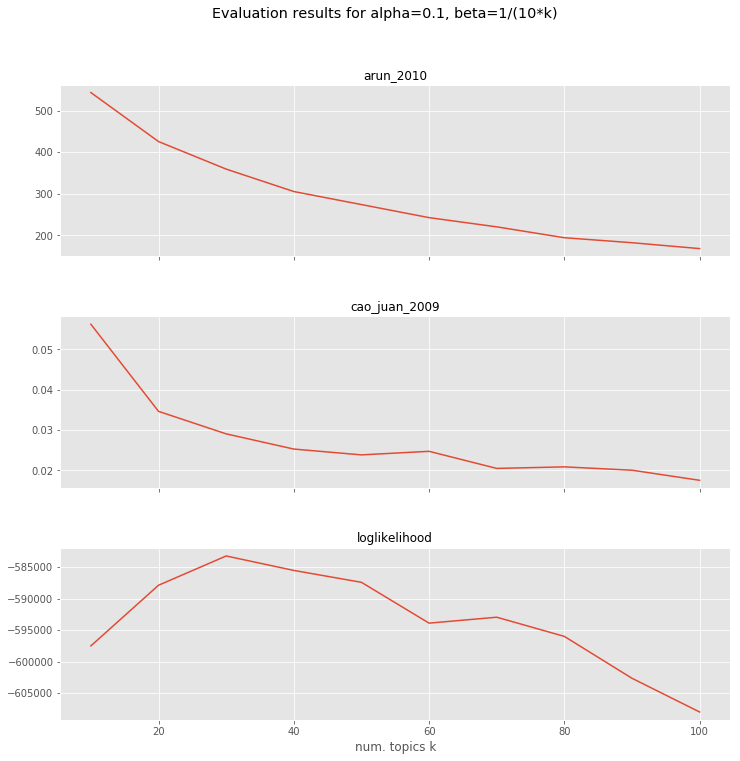

In [31]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 0.1 beta: 0.001

In [32]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 110, 10))
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 10
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 60
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_topics: 30
INFO:lda:n_words: 98337
INFO:lda:n_topics: 40
INFO:lda:n_topics: 90
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 80
INFO:l

INFO:lda:<60> log likelihood: -615062
INFO:lda:<280> log likelihood: -619765
INFO:lda:<120> log likelihood: -600821
INFO:lda:<50> log likelihood: -625240
INFO:lda:<70> log likelihood: -609962
INFO:lda:<90> log likelihood: -606719
INFO:lda:<290> log likelihood: -619561
INFO:lda:<180> log likelihood: -604247
INFO:lda:<130> log likelihood: -599946
INFO:lda:<300> log likelihood: -619299
INFO:lda:<110> log likelihood: -601813
INFO:lda:<50> log likelihood: -633986
INFO:lda:<310> log likelihood: -619208
INFO:lda:<190> log likelihood: -603700
INFO:lda:<320> log likelihood: -619245
INFO:lda:<140> log likelihood: -599674
INFO:lda:<100> log likelihood: -605711
INFO:lda:<80> log likelihood: -609288
INFO:lda:<200> log likelihood: -603529
INFO:lda:<60> log likelihood: -628499
INFO:lda:<330> log likelihood: -618923
INFO:lda:<70> log likelihood: -612334
INFO:lda:<120> log likelihood: -601113
INFO:lda:<210> log likelihood: -603079
INFO:lda:<340> log likelihood: -618993
INFO:lda:<60> log likelihood: -62

INFO:lda:<150> log likelihood: -609236
INFO:lda:<850> log likelihood: -615525
INFO:lda:<540> log likelihood: -597482
INFO:lda:<180> log likelihood: -602781
INFO:lda:<390> log likelihood: -592030
INFO:lda:<130> log likelihood: -622682
INFO:lda:<860> log likelihood: -615774
INFO:lda:<310> log likelihood: -594771
INFO:lda:<150> log likelihood: -615081
INFO:lda:<550> log likelihood: -597181
INFO:lda:<870> log likelihood: -615557
INFO:lda:<260> log likelihood: -596340
INFO:lda:<880> log likelihood: -615815
INFO:lda:<400> log likelihood: -592023
INFO:lda:<560> log likelihood: -597062
INFO:lda:<220> log likelihood: -600475
INFO:lda:<320> log likelihood: -594609
INFO:lda:<890> log likelihood: -615535
INFO:lda:<160> log likelihood: -608252
INFO:lda:<570> log likelihood: -597243
INFO:lda:<900> log likelihood: -615878
INFO:lda:<410> log likelihood: -591877
INFO:lda:<190> log likelihood: -602415
INFO:lda:<270> log likelihood: -595726
INFO:lda:<910> log likelihood: -615393
INFO:lda:<580> log likeli

INFO:lda:<890> log likelihood: -596229
INFO:lda:<300> log likelihood: -598189
INFO:lda:<1420> log likelihood: -614662
INFO:lda:<210> log likelihood: -618593
INFO:lda:<240> log likelihood: -611041
INFO:lda:<650> log likelihood: -589639
INFO:lda:<520> log likelihood: -592069
INFO:lda:<900> log likelihood: -596051
INFO:lda:<1430> log likelihood: -614571
INFO:lda:<350> log likelihood: -597534
INFO:lda:<1440> log likelihood: -614475
INFO:lda:<910> log likelihood: -595659
INFO:lda:<430> log likelihood: -592081
INFO:lda:<660> log likelihood: -589326
INFO:lda:<1450> log likelihood: -614785
INFO:lda:<530> log likelihood: -592722
INFO:lda:<270> log likelihood: -603646
INFO:lda:<1460> log likelihood: -614552
INFO:lda:<920> log likelihood: -596218
INFO:lda:<1470> log likelihood: -614697
INFO:lda:<310> log likelihood: -598547
INFO:lda:<670> log likelihood: -589669
INFO:lda:<360> log likelihood: -597600
INFO:lda:<1480> log likelihood: -614624
INFO:lda:<930> log likelihood: -595973
INFO:lda:<440> log

INFO:lda:<1980> log likelihood: -613865
INFO:lda:<580> log likelihood: -590629
INFO:lda:<1250> log likelihood: -595350
INFO:lda:<420> log likelihood: -597289
INFO:lda:<1990> log likelihood: -613678
INFO:lda:<910> log likelihood: -588244
INFO:lda:<1999> log likelihood: -613665
INFO:lda:<730> log likelihood: -590552
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -613678.477905
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.053796
INFO:lda:<1260> log likelihood: -595021
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 546.286955
INFO:lda:<330> log likelihood: -608825
INFO:lda:<370> log likelihood: -601905
INFO:lda:<1270> log likelihood: -594926
INFO:lda:<490> log likelihood: -595920
INFO:lda:<920> log likelihood: -588643
INFO:lda:<590> log likelihood: -590762
INFO:lda:<740> log likelihood: -590864
INFO:lda:<1280> log likelihood: -595178
INFO:lda:<300> log likelihood: -614975
INFO:lda:<430> log likelihood: -597273
INFO:lda:<930> log likelihood

INFO:lda:<1730> log likelihood: -594324
INFO:lda:<500> log likelihood: -600138
INFO:lda:<580> log likelihood: -596358
INFO:lda:<1250> log likelihood: -588422
INFO:lda:<1740> log likelihood: -594695
INFO:lda:<800> log likelihood: -589560
INFO:lda:<990> log likelihood: -590111
INFO:lda:<450> log likelihood: -607345
INFO:lda:<1750> log likelihood: -594302
INFO:lda:<670> log likelihood: -594362
INFO:lda:<1260> log likelihood: -588248
INFO:lda:<1760> log likelihood: -594515
INFO:lda:<590> log likelihood: -596434
INFO:lda:<810> log likelihood: -589920
INFO:lda:<1000> log likelihood: -590478
INFO:lda:<510> log likelihood: -600244
INFO:lda:<1270> log likelihood: -587974
INFO:lda:<1770> log likelihood: -594306
INFO:lda:<410> log likelihood: -612666
INFO:lda:<680> log likelihood: -594484
INFO:lda:<1780> log likelihood: -594419
INFO:lda:<1010> log likelihood: -590152
INFO:lda:<1280> log likelihood: -588086
INFO:lda:<820> log likelihood: -589715
INFO:lda:<460> log likelihood: -607163
INFO:lda:<179

INFO:lda:<580> log likelihood: -605827
INFO:lda:<1040> log likelihood: -589121
INFO:lda:<1640> log likelihood: -588084
INFO:lda:<1300> log likelihood: -589495
INFO:lda:<1050> log likelihood: -588921
INFO:lda:<1650> log likelihood: -587932
INFO:lda:<880> log likelihood: -593405
INFO:lda:<660> log likelihood: -598976
INFO:lda:<760> log likelihood: -595956
INFO:lda:<1310> log likelihood: -589651
INFO:lda:<1660> log likelihood: -587542
INFO:lda:<590> log likelihood: -605446
INFO:lda:<1060> log likelihood: -588949
INFO:lda:<530> log likelihood: -611220
INFO:lda:<890> log likelihood: -593280
INFO:lda:<1320> log likelihood: -589598
INFO:lda:<1670> log likelihood: -587790
INFO:lda:<670> log likelihood: -598931
INFO:lda:<770> log likelihood: -595941
INFO:lda:<1070> log likelihood: -589050
INFO:lda:<1680> log likelihood: -587533
INFO:lda:<1330> log likelihood: -589708
INFO:lda:<900> log likelihood: -593488
INFO:lda:<1690> log likelihood: -587541
INFO:lda:<600> log likelihood: -605588
INFO:lda:<1

INFO:lda:<970> log likelihood: -595375
INFO:lda:<1130> log likelihood: -592927
INFO:lda:<750> log likelihood: -604821
INFO:lda:<1670> log likelihood: -589517
INFO:lda:<1350> log likelihood: -588748
INFO:lda:<850> log likelihood: -598573
INFO:lda:<1680> log likelihood: -589440
INFO:lda:<1140> log likelihood: -593183
INFO:lda:<980> log likelihood: -595564
INFO:lda:<680> log likelihood: -610139
INFO:lda:<1360> log likelihood: -588807
INFO:lda:<1690> log likelihood: -589288
INFO:lda:<760> log likelihood: -604787
INFO:lda:<1150> log likelihood: -593326
INFO:lda:<860> log likelihood: -598852
INFO:lda:<1700> log likelihood: -589011
INFO:lda:<990> log likelihood: -595075
INFO:lda:<1370> log likelihood: -588767
INFO:lda:<1710> log likelihood: -589608
INFO:lda:<690> log likelihood: -610134
INFO:lda:<1160> log likelihood: -593113
INFO:lda:<770> log likelihood: -605097
INFO:lda:<1380> log likelihood: -588942
INFO:lda:<1000> log likelihood: -595402
INFO:lda:<870> log likelihood: -598728
INFO:lda:<1

INFO:lda:<970> log likelihood: -604212
INFO:lda:<1730> log likelihood: -588443
INFO:lda:<1260> log likelihood: -594634
INFO:lda:<870> log likelihood: -609350
INFO:lda:<1470> log likelihood: -592845
INFO:lda:<1740> log likelihood: -588785
INFO:lda:<1100> log likelihood: -598056
INFO:lda:<980> log likelihood: -605055
INFO:lda:<1270> log likelihood: -594800
INFO:lda:<1750> log likelihood: -588550
INFO:lda:<1480> log likelihood: -592830
INFO:lda:<1110> log likelihood: -598600
INFO:lda:<880> log likelihood: -609464
INFO:lda:<1760> log likelihood: -588504
INFO:lda:<1280> log likelihood: -594455
INFO:lda:<1490> log likelihood: -592593
INFO:lda:<990> log likelihood: -604291
INFO:lda:<1770> log likelihood: -588352
INFO:lda:<1120> log likelihood: -598471
INFO:lda:<1500> log likelihood: -592780
INFO:lda:<1290> log likelihood: -594196
INFO:lda:<890> log likelihood: -609716
INFO:lda:<1780> log likelihood: -588202
INFO:lda:<1000> log likelihood: -604622
INFO:lda:<1130> log likelihood: -598660
INFO:l

INFO:lda:<1900> log likelihood: -591796
INFO:lda:<1640> log likelihood: -594233
INFO:lda:<1270> log likelihood: -603659
INFO:lda:<1910> log likelihood: -592215
INFO:lda:<1440> log likelihood: -597950
INFO:lda:<1140> log likelihood: -608852
INFO:lda:<1650> log likelihood: -594142
INFO:lda:<1920> log likelihood: -591745
INFO:lda:<1280> log likelihood: -603621
INFO:lda:<1450> log likelihood: -598433
INFO:lda:<1660> log likelihood: -593848
INFO:lda:<1930> log likelihood: -592043
INFO:lda:<1150> log likelihood: -608899
INFO:lda:<1290> log likelihood: -603724
INFO:lda:<1670> log likelihood: -593930
INFO:lda:<1940> log likelihood: -592494
INFO:lda:<1460> log likelihood: -599046
INFO:lda:<1160> log likelihood: -608628
INFO:lda:<1680> log likelihood: -593428
INFO:lda:<1950> log likelihood: -592339
INFO:lda:<1300> log likelihood: -603589
INFO:lda:<1470> log likelihood: -598518
INFO:lda:<1960> log likelihood: -592373
INFO:lda:<1690> log likelihood: -593422
INFO:lda:<1170> log likelihood: -608877


INFO:lda:<1570> log likelihood: -608108
INFO:lda:<1980> log likelihood: -598063
INFO:lda:<1990> log likelihood: -597870
INFO:lda:<1760> log likelihood: -603548
INFO:lda:<1580> log likelihood: -608541
INFO:lda:<1999> log likelihood: -598268
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -597869.949347
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.018799
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 194.238779
INFO:lda:<1770> log likelihood: -603295
INFO:lda:<1590> log likelihood: -608268
INFO:lda:<1780> log likelihood: -603373
INFO:lda:<1600> log likelihood: -608176
INFO:lda:<1790> log likelihood: -603351
INFO:lda:<1610> log likelihood: -608343
INFO:lda:<1800> log likelihood: -603002
INFO:lda:<1620> log likelihood: -608130
INFO:lda:<1810> log likelihood: -603351
INFO:lda:<1630> log likelihood: -607939
INFO:lda:<1820> log likelihood: -603253
INFO:lda:<1640> log likelihood: -608407
INFO:lda:<1830> log likelihood: -603587
INFO:lda:<1650> l

plotting evaluation results


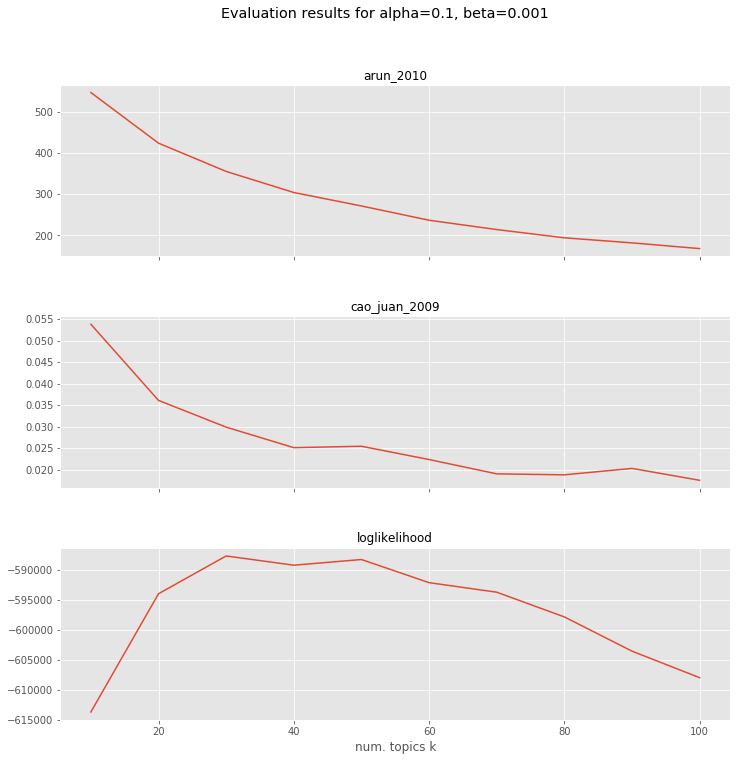

In [33]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 1/k beta: 1/(10*k)

In [34]:
const_params = dict(n_iter=2000)
ks = list(range(10, 110, 10))
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_documents: 18049
INFO:lda:n_documents: 18049
INFO:lda:vocab_size: 6394
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_words: 98337
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 30
INFO:lda:n_words: 98337
INFO:lda:vocab_size: 6394
INFO:lda:n_topics: 10
INFO:lda:n_topics: 40
INFO:lda:n_words: 98337
INFO:lda:n_documents: 18049
INFO:lda:n_topics: 50
INFO:lda:n_words: 98337
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 60
INFO:lda:n_iter: 2000
INFO:lda:n_words: 98337
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 70
INFO:lda:n_topics: 90
INFO:lda:n_iter: 2000
INFO:l

INFO:lda:<40> log likelihood: -573670
INFO:lda:<60> log likelihood: -562383
INFO:lda:<70> log likelihood: -558703
INFO:lda:<280> log likelihood: -599979
INFO:lda:<130> log likelihood: -567150
INFO:lda:<190> log likelihood: -574457
INFO:lda:<100> log likelihood: -558773
INFO:lda:<290> log likelihood: -599924
INFO:lda:<50> log likelihood: -563932
INFO:lda:<200> log likelihood: -574129
INFO:lda:<90> log likelihood: -567188
INFO:lda:<300> log likelihood: -599301
INFO:lda:<140> log likelihood: -566179
INFO:lda:<310> log likelihood: -599180
INFO:lda:<60> log likelihood: -560083
INFO:lda:<210> log likelihood: -574608
INFO:lda:<110> log likelihood: -558328
INFO:lda:<320> log likelihood: -599513
INFO:lda:<70> log likelihood: -559156
INFO:lda:<80> log likelihood: -556370
INFO:lda:<150> log likelihood: -565736
INFO:lda:<220> log likelihood: -573746
INFO:lda:<330> log likelihood: -599097
INFO:lda:<100> log likelihood: -565638
INFO:lda:<340> log likelihood: -598974
INFO:lda:<120> log likelihood: -5

INFO:lda:<540> log likelihood: -571710
INFO:lda:<210> log likelihood: -545493
INFO:lda:<860> log likelihood: -598273
INFO:lda:<160> log likelihood: -540696
INFO:lda:<300> log likelihood: -552717
INFO:lda:<140> log likelihood: -542184
INFO:lda:<550> log likelihood: -571781
INFO:lda:<390> log likelihood: -561709
INFO:lda:<870> log likelihood: -598335
INFO:lda:<260> log likelihood: -553691
INFO:lda:<880> log likelihood: -598545
INFO:lda:<560> log likelihood: -571771
INFO:lda:<310> log likelihood: -552282
INFO:lda:<400> log likelihood: -561658
INFO:lda:<890> log likelihood: -598178
INFO:lda:<220> log likelihood: -544951
INFO:lda:<570> log likelihood: -572002
INFO:lda:<190> log likelihood: -542028
INFO:lda:<900> log likelihood: -598267
INFO:lda:<130> log likelihood: -543716
INFO:lda:<410> log likelihood: -561418
INFO:lda:<910> log likelihood: -597969
INFO:lda:<580> log likelihood: -571791
INFO:lda:<270> log likelihood: -553665
INFO:lda:<320> log likelihood: -552027
INFO:lda:<170> log likeli

INFO:lda:<1420> log likelihood: -597895
INFO:lda:<500> log likelihood: -550030
INFO:lda:<900> log likelihood: -571203
INFO:lda:<420> log likelihood: -549819
INFO:lda:<1430> log likelihood: -597814
INFO:lda:<650> log likelihood: -560210
INFO:lda:<350> log likelihood: -541151
INFO:lda:<1440> log likelihood: -597576
INFO:lda:<910> log likelihood: -570808
INFO:lda:<210> log likelihood: -538788
INFO:lda:<510> log likelihood: -549782
INFO:lda:<1450> log likelihood: -597939
INFO:lda:<310> log likelihood: -537762
INFO:lda:<660> log likelihood: -560225
INFO:lda:<920> log likelihood: -570958
INFO:lda:<1460> log likelihood: -597824
INFO:lda:<430> log likelihood: -550221
INFO:lda:<270> log likelihood: -537010
INFO:lda:<240> log likelihood: -536309
INFO:lda:<1470> log likelihood: -598017
INFO:lda:<930> log likelihood: -570777
INFO:lda:<670> log likelihood: -560373
INFO:lda:<520> log likelihood: -550003
INFO:lda:<360> log likelihood: -540208
INFO:lda:<1480> log likelihood: -597948
INFO:lda:<1490> lo

INFO:lda:<1990> log likelihood: -597500
INFO:lda:<910> log likelihood: -558393
INFO:lda:<1250> log likelihood: -570583
INFO:lda:<700> log likelihood: -549429
INFO:lda:<290> log likelihood: -534365
INFO:lda:<1999> log likelihood: -597483
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -597500.213748
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.056210
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 543.253636
INFO:lda:<370> log likelihood: -534789
INFO:lda:<1260> log likelihood: -570639
INFO:lda:<920> log likelihood: -558706
INFO:lda:<490> log likelihood: -539123
INFO:lda:<590> log likelihood: -548447
INFO:lda:<330> log likelihood: -533651
INFO:lda:<710> log likelihood: -549419
INFO:lda:<1270> log likelihood: -570299
INFO:lda:<430> log likelihood: -535671
INFO:lda:<930> log likelihood: -558005
INFO:lda:<1280> log likelihood: -570627
INFO:lda:<720> log likelihood: -549717
INFO:lda:<500> log likelihood: -538988
INFO:lda:<600> log likelihood:

INFO:lda:<800> log likelihood: -547214
INFO:lda:<400> log likelihood: -531892
INFO:lda:<670> log likelihood: -537915
INFO:lda:<580> log likelihood: -534021
INFO:lda:<1730> log likelihood: -569888
INFO:lda:<1260> log likelihood: -556468
INFO:lda:<970> log likelihood: -548350
INFO:lda:<510> log likelihood: -533182
INFO:lda:<1740> log likelihood: -570029
INFO:lda:<450> log likelihood: -531206
INFO:lda:<810> log likelihood: -546930
INFO:lda:<1270> log likelihood: -556481
INFO:lda:<1750> log likelihood: -570213
INFO:lda:<680> log likelihood: -537491
INFO:lda:<980> log likelihood: -548299
INFO:lda:<590> log likelihood: -534016
INFO:lda:<1760> log likelihood: -569949
INFO:lda:<1280> log likelihood: -556633
INFO:lda:<820> log likelihood: -546618
INFO:lda:<410> log likelihood: -531974
INFO:lda:<1770> log likelihood: -570603
INFO:lda:<990> log likelihood: -548199
INFO:lda:<520> log likelihood: -533009
INFO:lda:<1290> log likelihood: -556784
INFO:lda:<460> log likelihood: -531268
INFO:lda:<690> l

INFO:lda:<1630> log likelihood: -556437
INFO:lda:<1050> log likelihood: -545921
INFO:lda:<880> log likelihood: -537185
INFO:lda:<1640> log likelihood: -556403
INFO:lda:<1270> log likelihood: -547873
INFO:lda:<760> log likelihood: -532979
INFO:lda:<590> log likelihood: -529800
INFO:lda:<670> log likelihood: -532441
INFO:lda:<1650> log likelihood: -556237
INFO:lda:<530> log likelihood: -529994
INFO:lda:<1280> log likelihood: -548421
INFO:lda:<1060> log likelihood: -546247
INFO:lda:<890> log likelihood: -537086
INFO:lda:<1660> log likelihood: -556312
INFO:lda:<770> log likelihood: -532978
INFO:lda:<1290> log likelihood: -548499
INFO:lda:<1670> log likelihood: -556214
INFO:lda:<1070> log likelihood: -546259
INFO:lda:<680> log likelihood: -532210
INFO:lda:<600> log likelihood: -529730
INFO:lda:<900> log likelihood: -537427
INFO:lda:<1680> log likelihood: -556252
INFO:lda:<540> log likelihood: -530039
INFO:lda:<1300> log likelihood: -548410
INFO:lda:<1080> log likelihood: -546231
INFO:lda:<7

INFO:lda:<1350> log likelihood: -545381
INFO:lda:<1630> log likelihood: -548105
INFO:lda:<860> log likelihood: -531280
INFO:lda:<680> log likelihood: -528707
INFO:lda:<1130> log likelihood: -537425
INFO:lda:<980> log likelihood: -532286
INFO:lda:<1640> log likelihood: -547751
INFO:lda:<1360> log likelihood: -545346
INFO:lda:<760> log likelihood: -528833
INFO:lda:<1140> log likelihood: -537071
INFO:lda:<1650> log likelihood: -547627
INFO:lda:<870> log likelihood: -531673
INFO:lda:<1370> log likelihood: -545705
INFO:lda:<990> log likelihood: -531986
INFO:lda:<690> log likelihood: -529135
INFO:lda:<1660> log likelihood: -547554
INFO:lda:<770> log likelihood: -528598
INFO:lda:<1150> log likelihood: -536807
INFO:lda:<1380> log likelihood: -545693
INFO:lda:<1670> log likelihood: -548006
INFO:lda:<880> log likelihood: -531692
INFO:lda:<1000> log likelihood: -531716
INFO:lda:<1160> log likelihood: -536913
INFO:lda:<1390> log likelihood: -544972
INFO:lda:<1680> log likelihood: -547919
INFO:lda:

INFO:lda:<1100> log likelihood: -530778
INFO:lda:<1730> log likelihood: -544294
INFO:lda:<970> log likelihood: -528340
INFO:lda:<1450> log likelihood: -536616
INFO:lda:<1740> log likelihood: -544351
INFO:lda:<1260> log likelihood: -532226
INFO:lda:<1110> log likelihood: -530600
INFO:lda:<880> log likelihood: -527781
INFO:lda:<1460> log likelihood: -536672
INFO:lda:<1750> log likelihood: -544217
INFO:lda:<980> log likelihood: -528560
INFO:lda:<1270> log likelihood: -531776
INFO:lda:<1120> log likelihood: -530844
INFO:lda:<1470> log likelihood: -536230
INFO:lda:<1760> log likelihood: -544657
INFO:lda:<890> log likelihood: -527738
INFO:lda:<990> log likelihood: -528040
INFO:lda:<1280> log likelihood: -531750
INFO:lda:<1770> log likelihood: -544682
INFO:lda:<1480> log likelihood: -536664
INFO:lda:<1130> log likelihood: -531004
INFO:lda:<1780> log likelihood: -544261
INFO:lda:<1290> log likelihood: -531747
INFO:lda:<1490> log likelihood: -536735
INFO:lda:<900> log likelihood: -527591
INFO:l

INFO:lda:<1640> log likelihood: -531829
INFO:lda:<1440> log likelihood: -530939
INFO:lda:<1140> log likelihood: -527338
INFO:lda:<1890> log likelihood: -536571
INFO:lda:<1270> log likelihood: -527726
INFO:lda:<1650> log likelihood: -532132
INFO:lda:<1900> log likelihood: -536141
INFO:lda:<1450> log likelihood: -530809
INFO:lda:<1150> log likelihood: -527167
INFO:lda:<1280> log likelihood: -527593
INFO:lda:<1910> log likelihood: -536320
INFO:lda:<1660> log likelihood: -531847
INFO:lda:<1460> log likelihood: -530810
INFO:lda:<1920> log likelihood: -536165
INFO:lda:<1290> log likelihood: -527550
INFO:lda:<1670> log likelihood: -531732
INFO:lda:<1160> log likelihood: -526938
INFO:lda:<1470> log likelihood: -530715
INFO:lda:<1930> log likelihood: -536016
INFO:lda:<1680> log likelihood: -531683
INFO:lda:<1300> log likelihood: -527545
INFO:lda:<1170> log likelihood: -527023
INFO:lda:<1940> log likelihood: -536111
INFO:lda:<1480> log likelihood: -530459
INFO:lda:<1690> log likelihood: -531435


INFO:lda:<1570> log likelihood: -526523
INFO:lda:<1980> log likelihood: -529951
INFO:lda:<1750> log likelihood: -526874
INFO:lda:<1580> log likelihood: -526643
INFO:lda:<1990> log likelihood: -530335
INFO:lda:<1760> log likelihood: -527102
INFO:lda:<1999> log likelihood: -530308
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -530335.172719
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.032622
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 222.709208
INFO:lda:<1590> log likelihood: -526995
INFO:lda:<1770> log likelihood: -527004
INFO:lda:<1600> log likelihood: -526686
INFO:lda:<1780> log likelihood: -526809
INFO:lda:<1610> log likelihood: -526693
INFO:lda:<1790> log likelihood: -527143
INFO:lda:<1620> log likelihood: -526325
INFO:lda:<1800> log likelihood: -526789
INFO:lda:<1630> log likelihood: -526664
INFO:lda:<1810> log likelihood: -527047
INFO:lda:<1820> log likelihood: -527018
INFO:lda:<1640> log likelihood: -526934
INFO:lda:<1830> l

plotting evaluation results


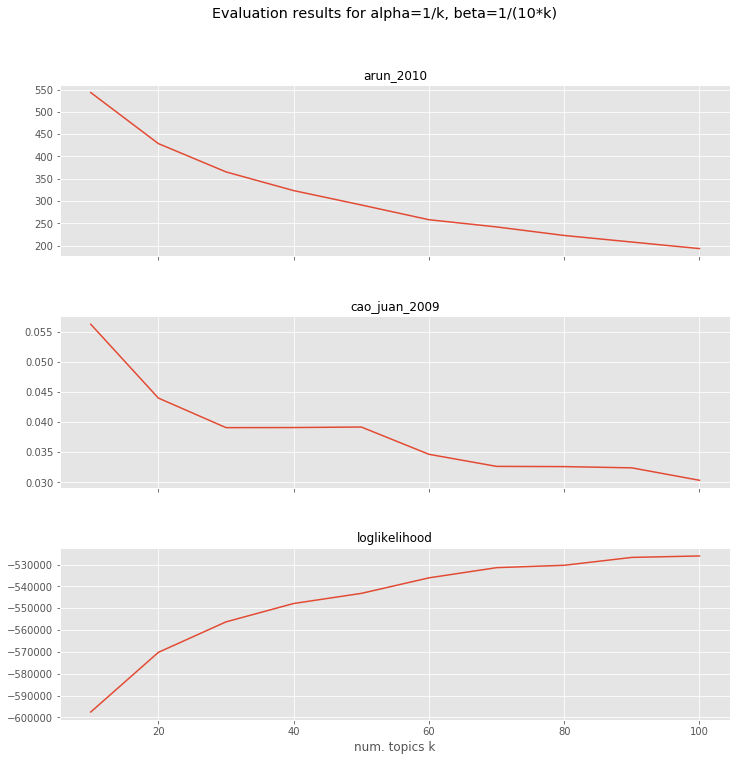

In [35]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

## Runing LDA

### topics: 30 - alpha: 0.1 - beta: 1/(10*k)

In [36]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix, num_topics=30, 
                                id2word = dictionary, passes=50, workers=16, 
                                alpha=0.1, eta=1.0/(10*30))

/usr/local/lib/python3.5/dist-packages/gensim/models/ldamodel.py:802: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [37]:
a =(ldamodel.print_topics(num_topics=60, num_words=5))
for x in a:
    print(x)

(0, '0.209*"wrench" + 0.191*"torque" + 0.101*"check" + 0.058*"straumann" + 0.032*"adapter"')
(1, '0.110*"post" + 0.060*"published" + 0.047*"origin" + 0.030*"spiral" + 0.029*"straumann"')
(2, '0.101*"model" + 0.091*"study" + 0.081*"teeth" + 0.064*"demonstration" + 0.064*"teach"')
(3, '0.130*"screw" + 0.114*"broken" + 0.105*"removal" + 0.102*"restoration" + 0.093*"remover"')
(4, '0.086*"teeth" + 0.079*"cell" + 0.076*"stem" + 0.075*"history" + 0.071*"mouth"')
(5, '0.110*"common" + 0.067*"around" + 0.033*"hand" + 0.033*"interesting" + 0.032*"surprisingly"')
(6, '0.234*"nobel" + 0.224*"biocare" + 0.053*"tapered" + 0.051*"groovy" + 0.041*"provide"')
(7, '0.096*"long" + 0.084*"short" + 0.059*"driver" + 0.057*"straumann" + 0.056*"torque"')
(8, '0.139*"technology" + 0.127*"placement" + 0.113*"announce" + 0.112*"alsgd" + 0.074*"tooth"')
(9, '0.126*"system" + 0.103*"motor" + 0.092*"surgical" + 0.075*"brushless" + 0.061*"drill"')
(10, '0.136*"ceramic" + 0.081*"press" + 0.067*"metal" + 0.063*"hydru

In [38]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 31):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.209*"wrench" + 0.191*"torque" + 0.101*"check" + 0.058*"straumann" + 0.032*"adapter"')

Check out Dental implant torque wrench Nobel Biocare #totalimplant https://t.co/hn4Bbl7iWM via @eBay


Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen #totalimplant https://t.co/R4y2Qp08ZK via @eBay


Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Compatible  https://t.co/bddzuSUOTA via @eBay


Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Compatible  https://t.co/bddzuSUOTA via @eBay


Check out Dental implant torque wrench Nobel Biocare, Implantdirect, Hiossen Comp #totalimplant https://t.co/EfPgvb7Ufh via @eBay


Check out Dental implant torque wrench Nobel Biocare Implantdirect Hiossen dds #totalimplant https://t.co/J4fncxG7ib via @eBay


Check out Dental implant torque wrench Nobel Biocare Implantdirect Hiossen dds tool #totalimplant https://t.co/rOXWpuluuV via @eBay


Check out Dental implant torque

Check out Dental Implant Screw Rescue Biomet 3I Zimmer Straumann Nobel Biocare #totalimplant https://t.co/xDQVRUewS5 via @eBay


Dental Implant Screw Rescue Biomet #3I #Zimmer #Straumann Nobel Cortex Thommen  https://t.co/tqFcoFYYiO via @eBay


Guess who has a knew titanium screw in her head? Yay dental implants


We are dental implant experts using only original Nobel Biocare Dental Implants for your All-on-4! Call 1800-7016039 https://t.co/yxHfljQ3az


New Dental Implant Broken Screw Rescue Kit EMS Ship 3M Nobel Biocare Straumann https://t.co/nffuZTh8X0 https://t.co/N3iqtj9IBQ


Check out Nobel Biocare Dental Implant Torque Wrench uk #NobelBiocareComp https://t.co/MKZdztbVDJ via @eBay


Nobel Biocare Osseoset 100 Dental Implant System https://t.co/KxPRrpj1xA Last Second Ebay Bid ↺RT, Favorite, Share


RT @totalimplant: New Dental Implant Broken Screw Rescue Kit EMS Ship 3M Nobel Biocare Straumann https://t.co/nffuZTh8X0 https://t.co/N3iqt…


#Dental Implants Smart Converter Nobel bio

dental implant types powerpoint Powerpoint Presentation - https://t.co/DcUQr1uebY  #powerpoint #slide #dental #implant #types #powerpoint


history of dental implants ppt PPT Templates - https://t.co/h9o53S56Jg  #history #of #dental #implants #ppt




-----------


topico: 12
(12, '0.076*"nobel" + 0.065*"straumann" + 0.061*"active" + 0.060*"drivers" + 0.058*"biocare"')

Straumann Dental Implant SCS Driver Torque worldwide shipping https://t.co/JqmDEYIN9t https://t.co/IUCGNe4huR


A crown is a type of dental restoration which completely caps a tooth or dental implant. 
#BeyondSmilesDental https://t.co/vz8sKym0iY


Straumann Dental Implant SCS driver - Free Shipping abutment crwon implant https://t.co/dCMpsBF2HJ https://t.co/o3JwCFeptT


Straumann Dental Implant SCS Free Shipping https://t.co/RMzvdEvrUC https://t.co/Sip1cUJQPA


Straumann Compatible Dental Implants RC Healing Abutment,bottle shape, D 4.7,H6 https://t.co/ASG3mvgOuw https://t.co/ofEITrstLn


50 x Dental Implant Implants FO

20 x Analog for Nobel Biocare Replace Trilobe WP, Dental Implant Lab Replica https://t.co/ashlFoU2qN https://t.co/yCMKSqrd40


IVORIE Transparent Dental Implant Disease Teaching Model Typodont Demonstration Pathological Removable Tooth Disply https://t.co/KtvX5Do7jw


Dentures or dental implants in your future? We have solutions! Come see us! https://t.co/KZS8A0bkYh https://t.co/p6tWFFoNdz


Dental Implants.

#affinitydental #affinitydentalclinics #loveyourteeth #loveyourself #dentalimplant... https://t.co/ItJ2XPFE0y


#MimgoStore Dental Implant Disease Study Teaching Adult Pathological Transparent Removable Teeth Model 100% Brand https://t.co/wz4LAbDfEb


20 x Analog for Nobel Biocare Replace Trilobe WP, Dental Implant Lab Replica https://t.co/kmihpkc49n https://t.co/78Dek1HSKt


RT @good_bid: 20 x Analog for Nobel Biocare Replace Trilobe WP, Dental Implant Lab Replica https://t.co/kmihpkc49n https://t.co/78Dek1HSKt


Did you know the Mayan's did Dental Implants as early as 600A.D., u

#cosmeticdentistry   Cool ”Dental Implants” images https://t.co/HKiJqnvmKT  #dentistry


Robert L Goodman: #cosmeticdentistry Cool ”Dental Implants” images… https://t.co/AVixVMLTWs #MedicBoard https://t.co/jnT8UTttpX


Check out #Dental Implants Expander Augmentation Bone Grafting Techniques #totalimplantcom https://t.co/732UMSSxMO via @eBay


Glidewell Laboratories Releases Latest Issue of Dental Implant Magazine Inclusive™ #News https://t.co/0dgBm9ALpy


5 Dental Implant Facts You Should Know - https://t.co/Em3kCBWSUx


Dental Implants – Facts and Myths https://t.co/YcSO1fJadN https://t.co/ViQD92pc2Q


We place only the best Dental Implants : Straumann ! And as low as $99* by the hand of one of our specialists.... https://t.co/D3IQiViFhP


Important Facts About Dental Implants https://t.co/q9QKqbYgUX #dentist


Check out Dental Implant Expander Augmentation Bone Grafting Sinus Lifting Maxillofacial  https://t.co/y3xtLDvF0k via @eBay


Check out Dental Implants Expander Augmentation B

IndexError: list index out of range